# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


#1 - Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population

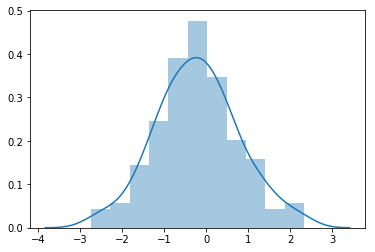

In [13]:
# Normal Curve for reference
normal_dist = np.random.normal(size=130)
sns.distplot(normal_dist)

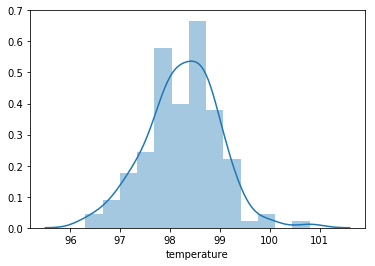

In [17]:
# Distribution of temperatures which looks like it follows a normal distribution
temp_dist = df['temperature']
sns.distplot(temp_dist)

#2 Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

**Yes, the sample size is relatively large (130) and observations are independent as I assume these are different people's body temperatures.**

#3 Is the true population mean really 98.6 degrees F? **Would need to perform a hypothesis test to determine this (See below), from the z test we can not say the true population mean is really 98.6**

Would you use a one-sample or two-sample test? Why? **Two sample test as a temperature can be above and below the mean**

In this situation, is it appropriate to use the  tt  or  zz  statistic? **A Z statistic is appropriate here as we assume a normal distribution for the population**

Now try using the other test. How is the result be different? Why? **A T-test would be similar but will have a larger confidence interval but our true population mean still falls outside the T-test confidence interval so our conclusions do not change.**

In [62]:
# Perform hypothesis test to determine if population mean is really 98.6, and using the 95% confidence interval we can see that 
# our sample mean falls below the lower end of the CI range meaning that we can not say that the true population mean is really
# 98.6

sample_mean = temp_dist.mean()
sample_std = temp_dist.std()
print('Sample Mean: {}, Sample STD: {}'.format(sample_mean, sample_std))

pop_mean = 98.6
pop_std = math.sqrt((sample_std**2)/len(temp_dist))
print('Population Mean: {}, Population STD: {}'.format(pop_mean, pop_std))

z_score = 1.96
conf_interval = (pop_mean - z_score*pop_std, pop_mean + z_score*pop_std)
print('Confidence Interval: {}'.format(conf_interval))


Sample Mean: 98.24923076923078, Sample STD: 0.7331831580389454
Population Mean: 98.6, Population STD: 0.064304416837891
Confidence Interval: (98.47396334299773, 98.72603665700225)


In [63]:
# T-test
t_score = 1.98
conf_interval = (pop_mean - t_score*pop_std, pop_mean + t_score*pop_std)
print('Confidence Interval: {}'.format(conf_interval))


Confidence Interval: (98.47267725466097, 98.72732274533902)


#4 Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use? **We would want to use a T-test since sample size is small**
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic? **T test produces a slightly larger confidence interval similar to what was seen before. **

In [64]:
np.random.seed(0)
df_new = df.take(np.random.permutation(len(df))[:10])

print(df_new.head(10))

temp_dist_small = df_new['temperature']

sample_mean = temp_dist_small.mean()
sample_std = temp_dist_small.std()
print('Sample Mean: {}, Sample STD: {}'.format(sample_mean, sample_std))

pop_mean = 98.6
pop_std = math.sqrt((sample_std**2)/len(temp_dist_small))
print('Population Mean: {}, Population STD: {}'.format(pop_mean, pop_std))

z_score = 1.96
conf_interval = (pop_mean - z_score*pop_std, pop_mean + z_score*pop_std)
print('Confidence Interval (Z-Test): {}'.format(conf_interval))

# T-test
t_score = 1.98
conf_interval = (pop_mean - t_score*pop_std, pop_mean + t_score*pop_std)
print('Confidence Interval (T-Test): {}'.format(conf_interval))



     temperature gender  heart_rate
8           98.4      F        84.0
59          97.6      M        73.0
92          98.8      F        84.0
104         97.6      M        69.0
97          98.7      F        64.0
30          98.3      M        86.0
44          99.0      F        79.0
33          98.6      M        82.0
63          98.6      M        83.0
26          97.8      F        62.0
Sample Mean: 98.34, Sample STD: 0.5059644256269423
Population Mean: 98.6, Population STD: 0.16000000000000053
Confidence Interval (Z-Test): (98.28639999999999, 98.9136)
Confidence Interval (T-Test): (98.2832, 98.9168)


#5 At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval. 

**Based on the population mean of 98.2 and the 95% confidence interval we can say temperatures below 98.1 and above 98.3 would be considered abnormal.

In [30]:
z_score = 1.96
pop_mean = 98.2
pop_conf_interval = (pop_mean - z_score*pop_std, pop_mean + z_score*pop_std)
print('Confidence Interval: {}'.format(pop_conf_interval))

Confidence Interval: (98.07396334299774, 98.32603665700226)


#6 Is there a significant difference between males and females in normal temperature?

What test did you use and why? **T-test is used for comparisons between two different groups**

Write a story with your conclusion in the context of the original problem. **There appears to be a difference observed in males and females body temperature but note that the p value was only slightly lower than 5% confidence interval so I would advise additional tests before drawing final conclusions**

In [44]:
from scipy.stats import ttest_ind

t_test = ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])

print("As we have found a p-value of %0.5F < 0.025 (two-tailed hypothesis), we can reject the null hypothesis that there is no difference between males and females" % t_test[1])


As we have found a p-value of 0.02393 < 0.025 (two-tailed hypothesis), we can reject the null hypothesis that there is no difference between males and females
